
<br>
    The objective of this exercise is that you analyse the code provided and<br>
    make the link with the curse. You have to provide a short report that<br>
    comments and analyse the results. You can use directly the results or adapt<br>
    them to you needs.<br>


import the numerical library

In [32]:
import numpy as np
# import signal processing library
import scipy.signal as sp
# import ploting library
import pylab as py
py.ion()
py.close('all')

load the ecg signal

In [33]:
x = np.genfromtxt('accel.dat')
# sampling frequency of the signal is 500 Hz
fs = 40
# generate correponding time vector
t = np.arange(len(x))/fs


 <br>
    The signal is an acceleration signal measured at the wrist.<br>
    The signal records the acceleration during the hand washing protocol in an<br>
    hospital. The goal is to detect the hand washing sequence.<br>
    The hand washing protocol produced rhythmical movements.<br>
    The protocol is known to take place between 20 and 30 seconds.<br>



 <br>
    Plot time signal.<br>
    Q: Comment the figure.<br>


Compute the FFT of the signal

In [34]:
x_fft = np.fft.fft(x)
# Determine the frequency scale
f_fft = np.arange(len(x_fft))/len(x_fft)*fs

plot the signal

Text(0.5, 1.0, 'acceleration signal signal')

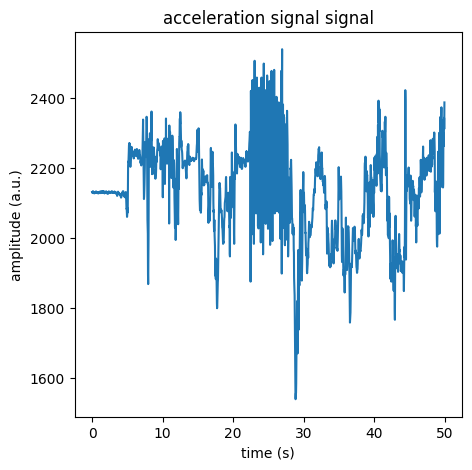

In [35]:
py.figure(1, figsize=[5,5])
py.clf()
py.plot(t, x)
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('acceleration signal signal')


 <br>
    High pass the signal.<br>
    Q: Comment the figure.<br>


high-pass filter with cutoff frequency of 0.5 Hz

In [36]:
b, a = sp.butter(4, 0.5/fs*2, btype='high')
# zero-phase filtering of the signal
x_hp = sp.filtfilt(b, a, x)

(20.0, 30.0)

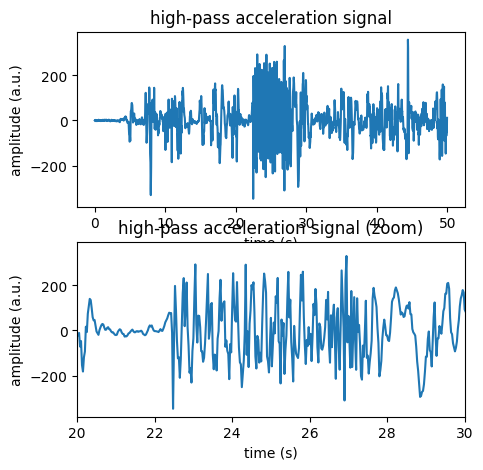

In [37]:
py.figure(2, figsize=[5,5])
py.clf()
py.subplot(2,1,1)
py.plot(t, x_hp)
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('high-pass acceleration signal')
py.subplot(2,1,2)
py.plot(t, x_hp)
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('high-pass acceleration signal (zoom)')
py.xlim(20, 30)


<br>
    Band pass the signal between 2.4 and 3.2 Hz.<br>
    Q: Based on previous figure, comment the selection of the frequencies.<br>
    Q: Why zero phase filter (filtfilt) is used?<br>


Analogic limit of the passband frequency

In [38]:
f_pass = np.array([2.4, 3.2])
# Analogic limit of the stopband frequency
f_stop = np.array([0, 5])
# Convertion into Nyquist frequency
f_pass_N = f_pass/fs*2
f_stop_N = f_stop/fs*2
# Max attenutation in passband (dB)
g_pass = 3
# Min attenuation in stopband (dB)
g_stop = 40
# Determine the order and the cutoff frequency of a butterworth filter
ord, wn = sp.buttord(f_pass_N, f_stop_N, g_pass, g_stop)
# Compute the coeffcients of the filter
b, a = sp.butter(ord, wn, btype='band')
# Filter the signal
x_bp = sp.filtfilt(b ,a, x_hp)

(20.0, 30.0)

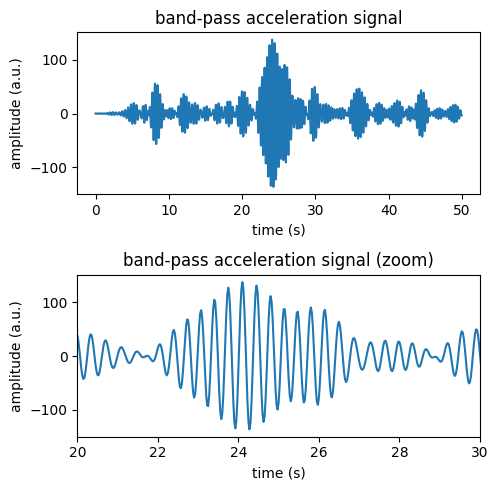

In [39]:
py.figure(3, figsize=[5,5])
py.clf()
py.subplot(2,1,1)
py.plot(t, x_bp)
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('band-pass acceleration signal')
py.subplot(2,1,2)
py.plot(t, x_bp)
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('band-pass acceleration signal (zoom)')
py.tight_layout()
py.xlim(20, 30)


<br>
    Low-pass filter of the power of the band-pass signal.<br>
    Q: Why use the power of the acceleration signal?<br>
    Q: How the detection of hand washing is obtained?<br>


Analogic limit of the passband frequency

In [40]:
f_pass = 0.4
# Analogic limit of the stopband frequency
f_stop = 0.8
# Convertion into Nyquist frequency
f_pass_N = f_pass/fs*2
f_stop_N = f_stop/fs*2
# Max attenutation in passband (dB)
g_pass = 3
# Min attenuation in stopband (dB)
g_stop = 40
# Determine the order and the cutoff frequency of a butterworth filter
ord, wn = sp.buttord(f_pass_N, f_stop_N, g_pass, g_stop)
# Compute the coeffcients of the filter
b, a = sp.butter(ord, wn)
# Filter the signal
x_pow = sp.filtfilt(b ,a, x_bp**2)
# detection
det = x_pow > 2000

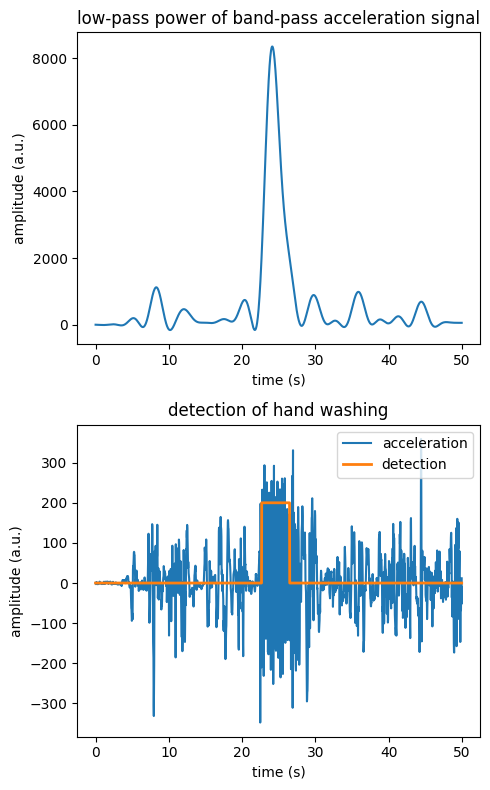

In [41]:
py.figure(4, figsize=[5,8])
py.clf()
py.subplot(2,1,1)
py.plot(t, x_pow)
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('low-pass power of band-pass acceleration signal')
py.subplot(2,1,2)
py.plot(t, x_hp, label='acceleration')
py.plot(t, det*200, linewidth=2, label='detection')
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('detection of hand washing')
py.tight_layout()
py.legend(loc='upper right')